In [1]:
# %%
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('C:/Users/jmc753/Work/RSQSim/rsqsim-python-tools/src/rsqsim_api')
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import pickle
import geopandas as gpd
# %%

procdir = os.path.join('C:',os.path.sep, 'Users', 'jmc753', 'Work', 'RSQSim', 'Aotearoa', 'whole_nz_rsqsim')
flt_file = 'whole_nz_faults_2500_tapered_slip.flt'
flt_file = os.path.abspath(os.path.join(procdir, flt_file))
faults = RsqSimMultiFault.read_fault_file_keith(fault_file=flt_file)

# %%
rsqsim_prefix = 'whole_nz'
eq_output_file = os.path.join(procdir, 'eqs.' + rsqsim_prefix + '.out')
catalogue = RsqSimCatalogue.from_catalogue_file_and_lists(eq_output_file, procdir, rsqsim_prefix, serial=False)
event_id = 1667647
event = catalogue.events_by_number([event_id], faults)[0]

C:\Users\jmc753\AppData\Local\Temp\ipykernel_9152\4043200069.py:4: UserWarning: This figure was saved with matplotlib version 3.8.3 and is unlikely to function correctly.
  fig, ax = pickle.load(open(f"{rupture_png_dir}/temp.pkl", "rb"))


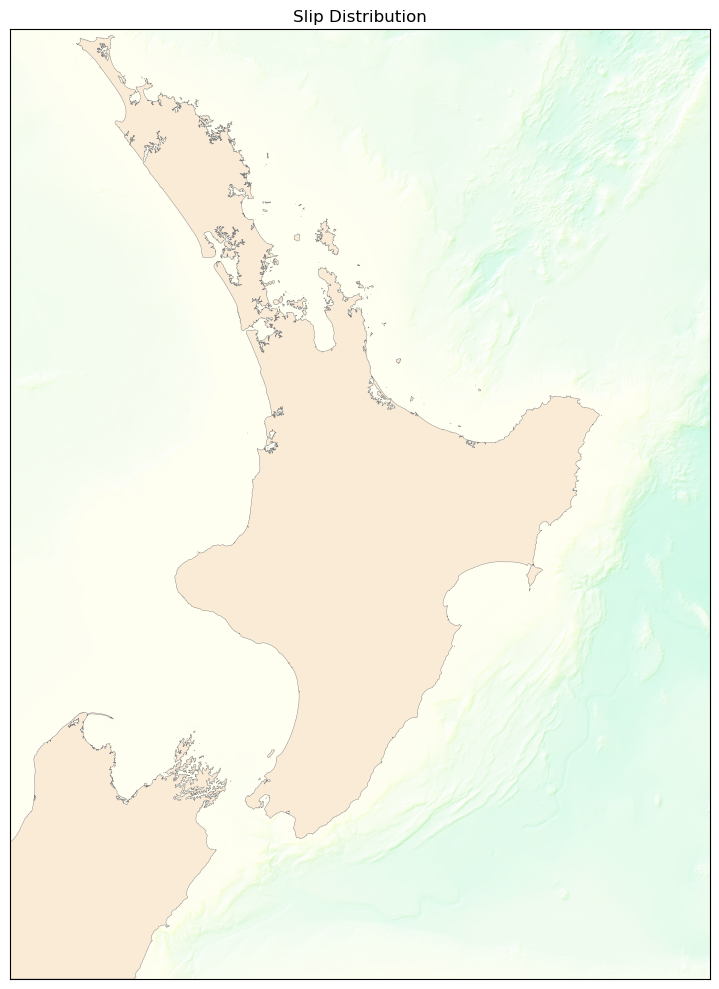

In [2]:
rupture_dir = 'Z:\\McGrath\\HikurangiFakeQuakes\\hikkerk3D_hires\\output\\ruptures\\'
rupture_png_dir = os.path.abspath(os.path.dirname(rupture_dir) + '/..\\rupture_pngs\\')

fig, ax = pickle.load(open(f"{rupture_png_dir}/temp.pkl", "rb"))

In [3]:
bounds = (1500000, 5250000, 2200000, 6200000)
min_slip, max_slip = 0.1, 50

In [4]:
event_plot = event.plot_slip_2d(subplots=(fig, ax['main_figure']), global_max_slip=max_slip,
                                global_max_sub_slip=10, bounds=bounds, plot_log_scale=True,
                                log_min=min_slip, log_max=max_slip, min_slip_value=min_slip, plot_zeros=False)

c:\Users\jmc753\AppData\Local\anaconda3\envs\rsqsim\lib\site-packages\rsqsim_api\catalogue\event.py:460: RuntimeWarning: All-NaN slice encountered
  if np.nanmax(colours) > max_slip:


In [ ]:
cbar = plt.colorbar(event_plot[0], ax=ax['main_figure'], orientation='vertical', label='Total Slip (m)')
ticks = np.arange(np.log10(min_slip), np.log10(max_slip), 1)
ticks = list(10**ticks) + [max_slip]
tick_labels = [f"{t:.0e}" for t in ticks]  # Format as scientific notation
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticks)
fig.title(f"ev{event_id}")
coastfile = "C:/Users/jmc753/Work/occ-coseismic/data/coastline/nz_coastline.geojson"
coastline = gpd.read_file(coastfile)
coastline.plot(ax=ax["main_figure"], color="k", linewidth=0.5)

fig.savefig(f"{rupture_png_dir}/ev{event_id}.png", dpi=300)
fig.savefig(f"{rupture_png_dir}/ev{event_id}.pdf", dpi=300, format='pdf')
fig.close()

AttributeError: 'Figure' object has no attribute 'title'

<Figure size 640x480 with 0 Axes>